# **XSPL Research Experience for High school students (REH)** 

### written by [Jackie Champagne](https://github.com/jbchampagne/pythontutorials) (UT Austin), adapted by [Hannah Hasson](https://github.com/hrhasson/python-for-high-schoolers) (U of Rochester)  
&nbsp;  
# Introduction to Python Day 3:
# Statistics, Interpolation & Fitting Data

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics. 

Python has lots of built in functions for generating random data. Today let's start with generating random values from a Gaussian distribution. 

But of course, let's import numpy and matplotlib first :)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##What is a Gaussian?

A gaussian (a.k.a. "bell curve") is one of the most common curves you will see in physics. The gaussian looks like a single smooth peak, and shows up in statistical physics quite a bit. For example, emission lines in stars and other plasmas generally take this shape. The function looks like this:

>$f(x)=a e^\frac{-(x-\mu)^2}{2\sigma^2}$

The center of the curve is at position $\mu$, and the curve has width 2$\sigma$ and maximum height $a$. 

Note that here $e$ is Euler's number ($e\sim 2.7$.) The python function for $e$ raised to some power is np.exp(some_power).

&nbsp;

Here is what a gaussian curve looks like:

![](https://drive.google.com/uc?export=view&id=1DO9ehzwfXJOC6dtjdT-_PtMi_PUwJkRV)

If the area under the gaussian adds to 1, we call it a "normal curve."

Now we're going to try our hand at generating some "random" fake data from a gaussian distribution, which means we will pick data points randomly from a version of this curve with noise added. We will then plot the fake data and try to fit it to a gaussian curve as if it were data from an experiment!

&nbsp;

We start by using a function to get some random gaussian data. Here we use np.random.normal, which takes as its arguments the center position $\mu$, the width of the curve $\sigma$ and the number of random samples you want.

In [ ]:
#Generate random data from a gaussian curve

gaussian = np.random.normal(0, 2, 1000) 
#Gaussian centered on 0 with a std. dev. of 2, sampled 1000 times

## Histograms 

You'll probably want to make a histogram of data at some point. Histograms have values of the data on the x-axis, and the number of times the value occured in the data on the y-axis. 

To make a histogram, use plt.hist().

    plt.hist(data, bins, normed=True/False)
    
When you plot a histogram, you have to set "**bins**" for your data, or group it by ranges of values. **Basically this decides how wide your bars are** and how much detail you can see.

The "bins" argument in plt.hist() can either be an array of bin boundaries, or simply setting "bins=x" for how many evenly spaced bins you want. Setting "density=True" will scale the y-axis to make the sum of your data equal to 1. This scaling is called "**normalizing**" your data.

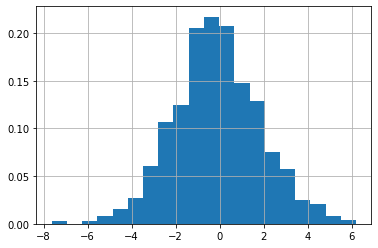

In [ ]:
plt.hist(gaussian, bins=20, density=True)
plt.grid(True)
plt.show()

Just like with normal plotting, there are lots of customizable options for histograms, including:

    facecolor: string argument giving color of histogram
    edgecolor: string argument giving edge color
    alpha: opacity, ranging from 0 to 1
    hatch: a histogram filling style, such as '\\', '//', '.', '..', etc
    histtype: bar, step
    normed: True/False
    cumulative: True/False
&nbsp;

## Gaussian Fitting

Let's try fitting a Gaussian curve to the data. This is a little bit redundant since we already know the Gaussian parameters that made the data, but this example should illustrate how the fitting process works. Let's use a package from scipy:

In [ ]:
from scipy.stats import norm

Pro-tip: if you're ever unsure about how to use a function, type ? after the function name to call up the docstrings.

&nbsp;

To fit a Gaussian, simply use norm.fit(data). This will return the mean (position) $\mu$ and standard deviation (width) $\sigma$ of the fitted curve. np.average() and np.std() will give the mean and standard deviation of the actual data.

In [ ]:
mu, sigma = norm.fit(gaussian)
print(mu, sigma)

-0.12922201521527177 1.9889400893170062


Recall that the values we fed to make the fake data were $\mu=0$ and $\sigma=2$. This did pretty well! It performs better the larger the sample you give it. 

&nbsp;

Next we will plot the Gaussian fit curve on top of the data. To make the curve, we will call a built-in function from python,
    
    norm.pdf(xvals, mu, sigma)

This is a function that makes a nice normalized curve (area under curve = 1) with the $\mu$ and $\sigma$ you give it. It will plot the curve across whatever range of x values you give.

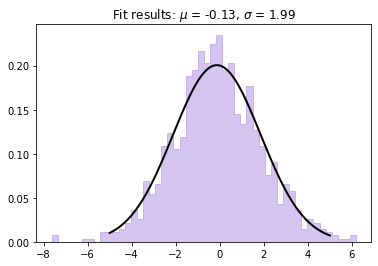

In [ ]:
x = np.linspace(-5, 5, 1000)
curve = norm.pdf(x, mu, sigma)

plt.plot(x, curve, 'k-', linewidth=2) #The black curve
plt.hist(gaussian, bins=50, color='mediumpurple', alpha=0.4, density=True, fill=True, histtype='step') #The purple histogram
plt.title("Fit results: $\mu$ = %.2f, $\sigma$ = %.2f" % (mu, sigma)) 
#Pro-tip: this prints out the values of mu and sigma to 2 decimal places.
plt.show()

### Question 1: Sample the Gaussian distribution (like in the example) centered on 4 with a standard deviation of 1 and sample size of 1000. Plot the histogram only (no need to normalize this time). 

(-2.5, 10.0)

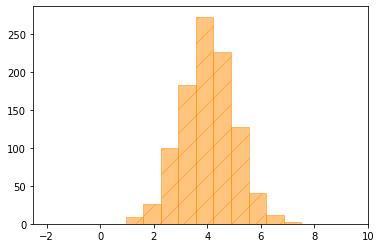

In [ ]:
# solution here

more_gaussian = np.random.normal(4, 1, 1000)
plt.hist(more_gaussian, bins=10, facecolor='darkorange', edgecolor='darkorange', hatch='/', alpha=0.5)
plt.xlim(-2.5, 10)

&nbsp;

## Interpolating Data

You may encounter a situation in research where you will need to **interpolate** a model to interpret your data. This means **finding values in between where you actually have data points**. The scipy library has many different interpolating (and extrapolating) algorithms, but the simplest is a 1D interpolation, called interp1d. 

Let's first generate a well-behaved function that will be easy to interpolate along. We will use sin(x) for this example and give it a bunch of spaced-out x values.

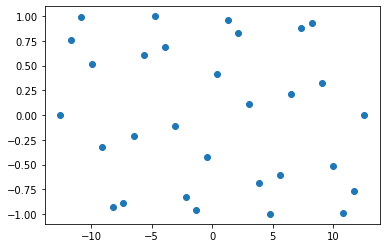

In [ ]:
xarray = np.linspace(-4*np.pi, 4*np.pi, 30)
yarray = np.sin(xarray)

plt.plot(xarray, yarray, 'o')
plt.show()

What do you notice about this plot? Well, at first glance it doesn't really look like a sine curve because it is poorly sampled. Of course, since we already know it's a sine curve, we could just sample the function better, but say you didn't have such a nice function. Interp1d comes to the rescue! 

In [ ]:
from scipy.interpolate import interp1d

There are a few steps to interpolation. 

1.   First, feed the interp1d function your original x- and y-values. It will solve between the points and output a function
2.   Then, you need to define a new array of x points, which must completely fit inside the original x array
3.   Feed this new set of x points into the function you made in the first step to get the corresponding y-values.

 

For our example, we'll take the same range of x-values, but take more sample points.

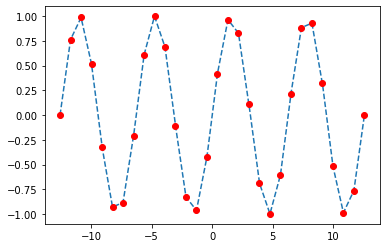

In [ ]:
interp = interp1d(xarray, yarray)
xnew = np.linspace(-4*np.pi, 4*np.pi, 1000)
ynew = interp(xnew)

plt.plot(xnew, ynew, '--')
plt.plot(xarray, yarray, 'or')
plt.show()

Now it looks much closer to a sine curve!

&nbsp; 
&nbsp; 
-------
#PAUSE HERE AND TAKE A BREAK!
-------

## Loading data into Python

Up until now, none of the exercises have required you to load in an outside file to the notebook, but this is definitely something you'll need to learn! You can use np.genfromtxt, np.loadtxt, or pandas (more complex). 

If it's just a 1D array of floats, then simply **np.genfromtxt('filename')** will suffice. Other arguments include "dtype" which allows you to specify that they're strings or integers, and in a moment I'll show you how to transpose a text file.

&nbsp;

There is an additional piece of information that you need if you're going to load a file into Google Colab. Before loading the file in python, go to the file folder icon on the left sidebar and click the icon for "upload" (piece of paper with an up arrow). Find the file you want to use on your computer and once it's uploaded, it should appear on the files list. For our exercise today, **please upload the file "test_spectrum.txt,"** which was included in the course folder.

&nbsp;

## Fitting a Spectrum

Finally we can put what we've learned together to do a real life physics example! We will do this exercise together.

Here is a sample spectrum which features a prominent spectral emission line. Our job will be to fit the line with a Gaussian model to compute its peak value and its width. 

&nbsp;

First let's load up the spectrum. Python reads by rows, not columns. But if you want to load each column in as separate array, you can transpose it by doing np.genfromtxt('filename').T and then take each row as an array. You can define it all in one line, like so:

    col1, col2, col3 = np.genfromtxt('file_with_three_columns.txt').T

#### Load up the file "test_spectrum.txt", whose three columns are wavelength, flux, and error. Go look at the raw file so you understand what you're loading in.

In [ ]:
# load file here

wave, flux, error = np.genfromtxt('test_spectrum.txt').T

Let's plot up what we have so far. This is a great opportunity to show you another useful plotting tool: **error bars**! Error bars are used to show how much uncertainty there is in the value of each of your data.

Instead of doing plt.plot, you can do **plt.errorbar**, which plots both the data and the errorbars. The first two arguments are x and y like in plt.plot, and the next two arguments are xerr and yerr. You can specify the color of the errorbars using "ecolor", and you can put hats on the errorbar with "capsize."

#### Plot the spectrum with y errors (it doesn't have x errors) with the data in blue and the errorbars in magenta.

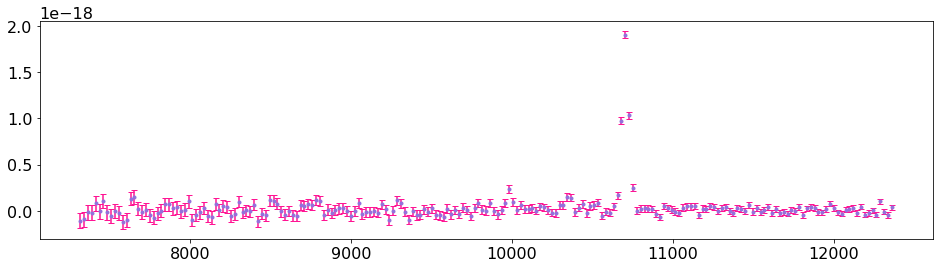

In [ ]:
# your plot here

# your plot here

plt.rc('ytick',labelsize=16)
plt.rc('xtick',labelsize=16)

#simplest way
plt.figure(figsize=(16, 4))
plt.errorbar(wave, flux, yerr=error, color='mediumpurple', ecolor='deeppink', capsize=3, fmt='o', markersize=3)
plt.show()

We're going to use the optimize function from scipy. This allows you to fit pretty much any kind of function you want, but here we know that the spectral line has a Gaussian profile. 

Many spectral lines are well-described by a Gaussian curve, and lines that deviate from a Gaussian are often physically interesting. So the first step in many spectroscopic projects is to see if your line is Gaussian.

&nbsp; 

Here is the function again:

>$f(x)=a e^\frac{-(x-\mu)^2}{2\sigma^2}$

Remember that $\mu$ is the **mean** of the Gaussian, or the wavelength at which the curve peaks.

$\sigma$ is the **width** of the curve (generally evaluated at half the peak height). There are physical reasons why your line might be wide, or skewed to one side.

$a$ is the **peak height** of the line -- how bright your plasma is.

&nbsp;

####First we will import optimize as opt. Then, using what you learned last time, define a Gaussian function which takes arguments x, $a$, $\mu$, and $\sigma$. When you use optimize, it's important that the first argument is the array you're fitting along, so here that is x. 

In [ ]:
#Import the optimize function
from scipy import optimize as opt

# THE ORDER MATTERS HERE: mu, sig, a is index 0, 1, 2 (x doesn't get fit)
def gauss(x, mu, sigma, a):
    #const = (sig * np.sqrt(2 * np.pi))**(-1) --> get rid of this part
    exp = np.exp(- (x - mu)**2 / (2 * sigma**2) )
    return a * exp

The optimize function returns the best fit parameters for your variables as well as something called the "covariance matrix" (don't worry about this). **p0 is the initial guess** for the fit - this is important because a bad first guess (or lack of a first guess) will cause a bad fit. If you are trying to fit multiple variables in your function, you will need to provide a guess for each variable, fed to the optimizer as a list. See how we do this below:

*NOTE: Make sure the order of the guesses in p0 is the same as the order of the arguments in the function!*

In [ ]:
bfpars, covar = opt.curve_fit(gauss, wave, flux, p0=[10700, 100, 2.0e-18], sigma=error) #edit p0, please!

print(bfpars)
#so now we see the line peaks at 10,704 Angstrom, it has a width of 219 Angstrom, 
#and it has a peak flux of 1.88e-18 erg s^-1 cm^-2 AA^-1

[1.07037446e+04 2.18701765e+01 1.87965529e-18]


"Bfpars" is now an array containing the best fit parameters, in the same order as your function. So in my case, bfpars[0] is $\mu$, bfpars[1] is $\sigma$, and bfpars[2] is $a$.

Try printing out the best fit parameters. Does this make sense to you? 

&nbsp;

Let's define a higher resolution wavelength grid we can use to overplot the fit. We can also zoom in on the line since the rest of the spectrum is noise.

Below, x should be a grid that is centered on $\mu$, and is plotted from -10$\sigma$ to 10$\sigma$.  This just means I want you to evaluate the Gaussian right where the emission line occurs.

In [ ]:
x = np.linspace(bfpars[0]-10*bfpars[1], bfpars[0]+10*bfpars[1], 1000) 
#Center the grid on the wavelength of the line
#and go +- 10*sigma from there

modelfit = gauss(x, bfpars[0], bfpars[1], bfpars[2]) 
#This is the Gaussian curve with the best fit parameters

&nbsp;

As your final task, plot the model over the data, making sure you zoom in on the line by choosing a wise range for xlim. 

*Bonus: Spectra are typically viewed along a long x-axis: try changing the* figure size (google it!).

(-5e-19, 2.2e-18)

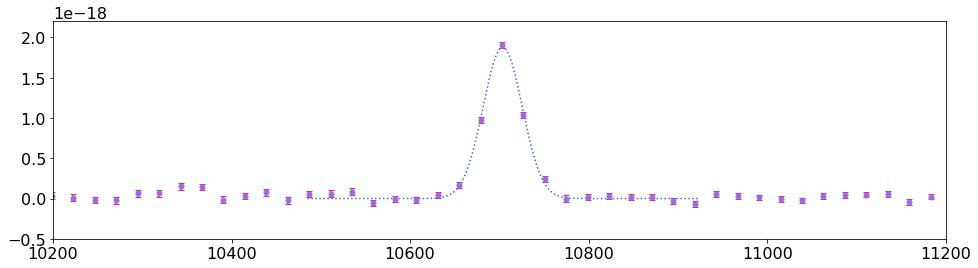

In [ ]:
# solution here

# solution here


# this part is an alternative to plt.fig, which may be useful if you want
# inset plots or various subplots. this will be helpful for putting in
# alternative axes, as you'll see below
fig, ax = plt.subplots(figsize=(16, 4), sharex=True, sharey=True)

plt.errorbar(wave, flux, yerr=error, color='mediumpurple', ecolor='deeppink', capsize=3, fmt='o', markersize=5, label='data') #,label='data w/ error')
plt.plot(x, modelfit, linestyle=':', color='royalblue', label='gaussian model')
plt.xlim(10200, 11200)
plt.ylim(-0.5e-18, 2.2e-18)


&nbsp;

Congrats, you've done your first bit of science with Python!


###Don't forget to do your final set of exercises in the Exercises.ipynb file. Work with your classmates and send me the exercises when you're all done :)